# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">🟠Wine Quality Regression🟠</p>

### Introduction to Wine Quality Dataset

> The Wine Quality dataset is a collection of chemical and sensory data associated with various red and white wines. This dataset is often utilized in the field of oenology and data science to explore the relationships between the chemical composition of wines and their perceived quality.

> The dataset comprises 12 different features, encompassing various aspects of wine chemistry, including acidity levels, sugar content, sulfur dioxide concentrations, and alcohol percentage. These features are measured or calculated through scientific analysis, providing a comprehensive overview of the chemical makeup of each wine.

> One of the key aspects of this dataset is the inclusion of a quality score, ranging from 0 to 10, which serves as the output variable. This quality score is typically assigned based on sensory evaluations, where human tasters assess the overall quality of the wine.

> Researchers and data scientists often leverage this dataset to develop predictive models or conduct exploratory analyses to understand how specific chemical attributes correlate with the perceived quality of wines. Such analyses can offer valuable insights into the factors that contribute to a wine's quality and help winemakers optimize their production processes.

> Whether you are interested in the chemistry of wines, predictive modeling, or the intersection of both, the Wine Quality dataset provides a rich source of information for exploring the intricate relationship between chemical composition and sensory perception in the world of winemaking.


<center><span style="color:#f7c297;font-family:cursive;font-size:100%"> </span></center>
<center><img src="https://i.imgur.com/fYOeoTX.jpg" width="800" height="800"></center>

<div style="border-radius: 10px; border: #6B8E23 solid; padding: 15px; background-color: #F5F5DC; font-size: 100%; text-align: left">

<h3 align="left"><font color='#556B2F'>👀 Features : </font></h3>
   
1- **Fixed Acidity:** This refers to the total concentration of acids present in the wine. Acids are important for the taste and stability of the wine.

2- **Volatile Acidity:** This measures the amount of volatile acids in the wine, which can contribute to off-flavors and aromas if present in excess.

3- **Citric Acid:** This is one of the fixed acids and contributes to the overall acidity of the wine. It also adds a citrusy flavor.

4- **Residual Sugar:** This is the amount of sugar remaining in the wine after fermentation. Wines can be dry (very little residual sugar) or sweet (higher residual sugar).

5- **Chlorides:** The concentration of salt in the wine, which can affect its taste.

6- **Free Sulfur Dioxide:** Sulfur dioxide is used in winemaking as a preservative and antioxidant. The free form is the portion that is not bound to other compounds.

7- **Total Sulfur Dioxide:** This is the total amount of sulfur dioxide in the wine, including both the free and bound forms.

8- **Density:** The density of the wine, which is related to its alcohol content and sugar content.

9- **pH:** This measures how acidic or basic the wine is on a scale from 0 to 14. Lower pH values indicate higher acidity.

10- **Sulphates:** These are compounds containing sulfur, often added to wine as a preservative.

11- **Alcohol:** The percentage of alcohol in the wine, which is a crucial factor in determining the wine's body and overall character.

12- **Quality (Output Variable):** This is a subjective score given to the wine based on sensory data. It ranges from 0 to 10, with higher values indicating better quality.

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [56]:
#reading our csv's for train,test,sub,original
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [57]:
#looking first 5 of our train
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [58]:
print(df.shape)

(1599, 12)


In [59]:
print(df.isnull().values.any())

False


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* **Null Values: total number of null values present in our data**
 
* Our data set have no missing value

* **Total samples of data: number of rows provided**

* Our dataset  have 1599 rows, 12 columns


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">EDA and Cleaning Data</p>

In [61]:
#We 240 duplicated in our data, lets drop them
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [62]:
df.drop_duplicates(inplace=True)

In [63]:
#resetting index since we dropped some duplicated
df.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:
df.describe([0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,5.200000,7.9000,13.24200,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.5200,1.02920,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.2600,0.70420,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.400000,2.2000,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.0790,0.36842,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,14.0000,50.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,38.0000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.9967,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.3100,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.6200,1.28000,2.00000


In [65]:
num_cols = [col for col in df.columns if (df[col].dtype in ["int64","float64"]) & (df[col].nunique()>50)]
num_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [66]:
target = df["quality"]

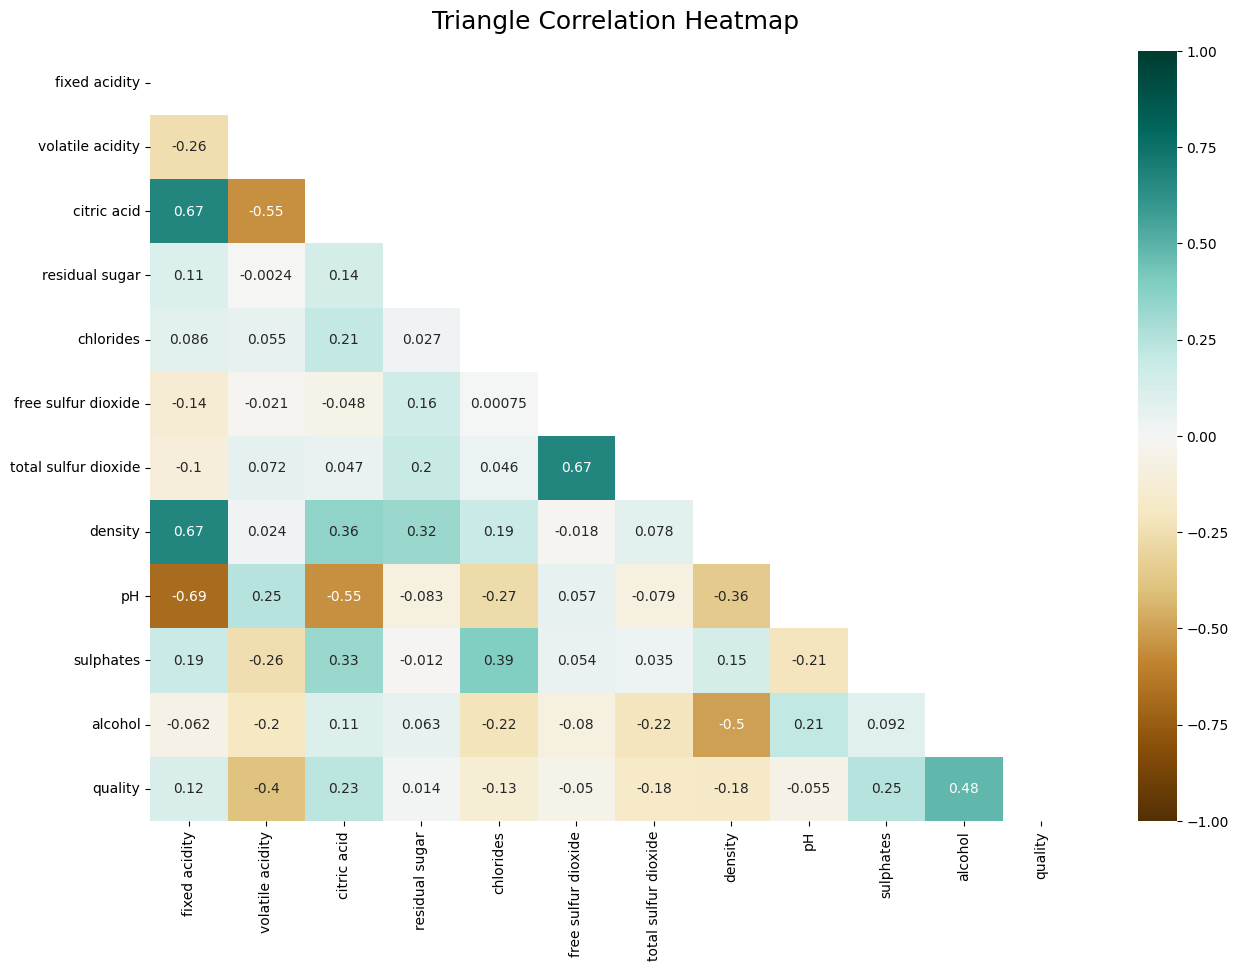

In [67]:
df.corr()
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* As we can see, Ph and Fixed Acidity have negative colleration, 

* Density and Fixed acitty have possitive corellation, 
    
* Citric acid and fixed acidity have possitive colleration

In [68]:
df["Quality_Range"] = pd.cut(df["quality"], 
                                 bins=[-np.inf, 4, 6, np.inf], 
                                 labels=["3-4","5-6","7-8"])

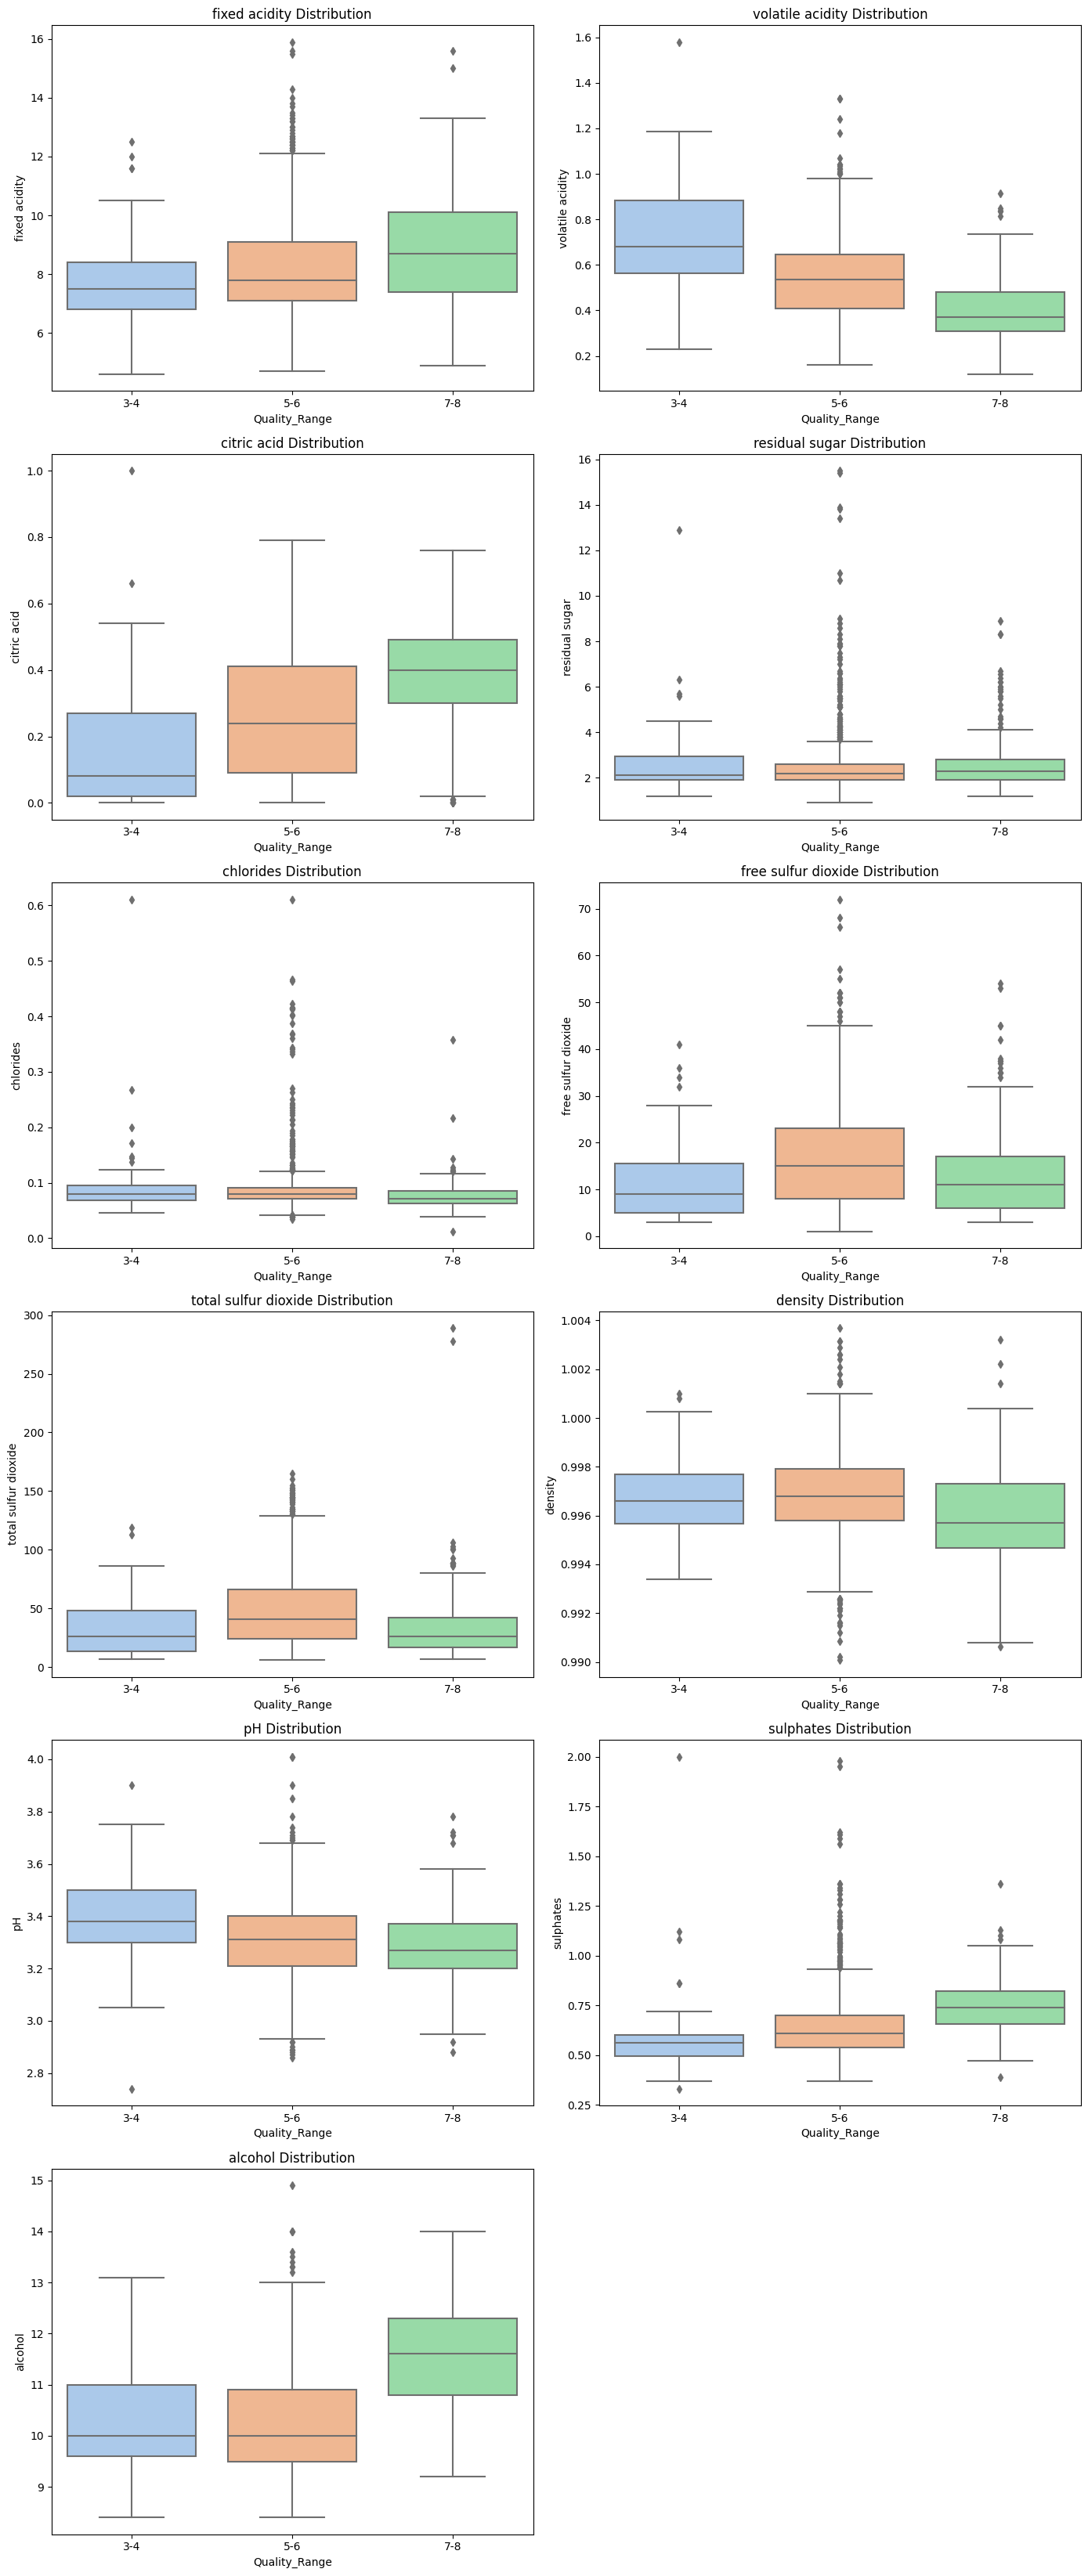

In [69]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Quality_Range", y=column, data=df,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

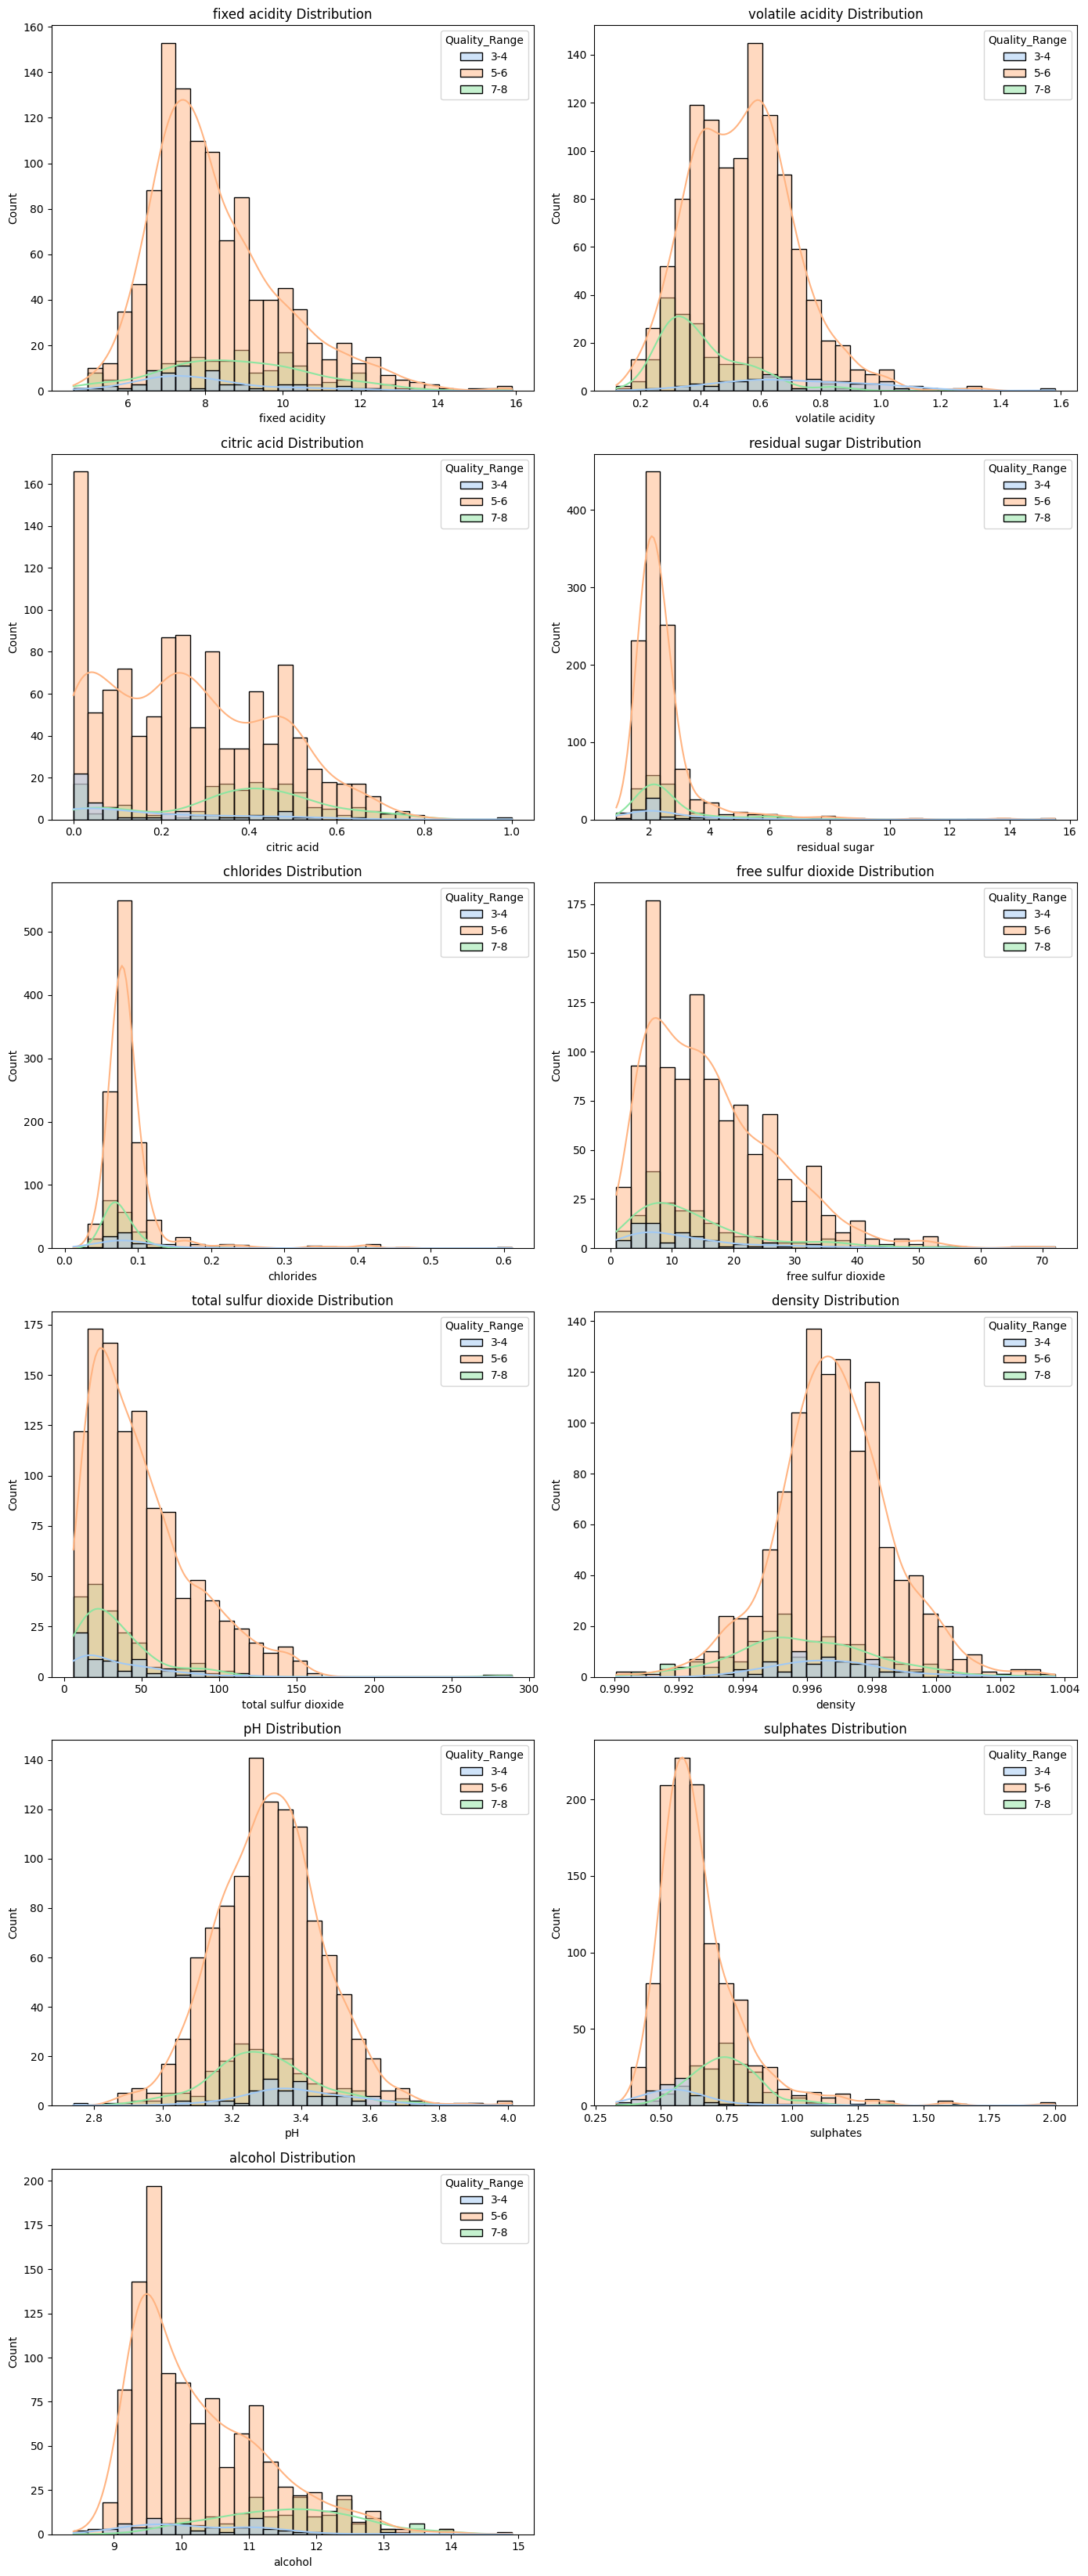

In [70]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="Quality_Range", data=df,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

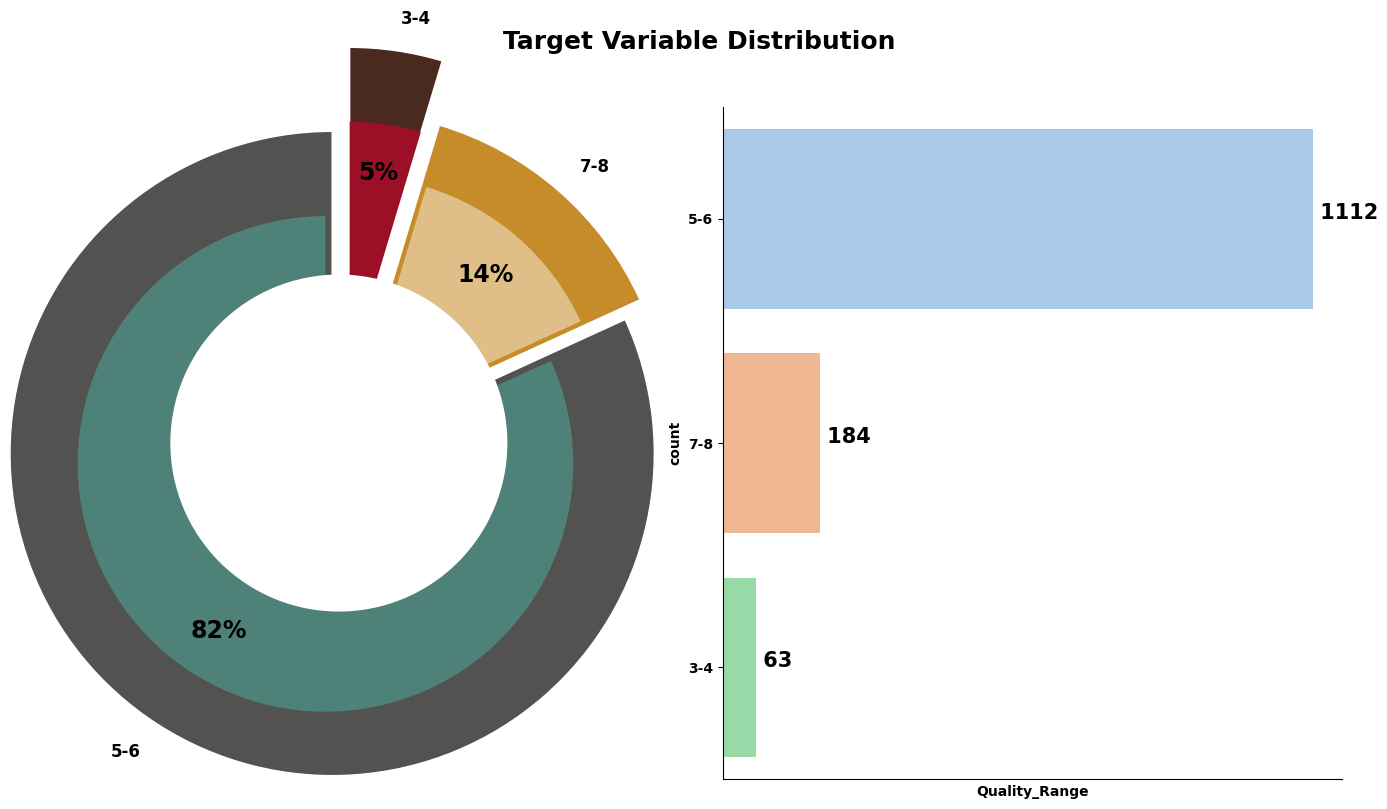

In [71]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 8))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#525250', '#C68C2A','#4A291E', '#269FAC', '#FF9074']
    inner_colors = ['#4E8278', '#DFBF87','#9C1027', '#98BDB1', '#FECA8B']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 17, 
        'weight': 'bold', 
        'color': 'black'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='pastel', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i, " "+str(v), color='black', fontweight='bold', fontsize=15)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_count(df, 'Quality_Range', 'Target Variable Distribution')

# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">Feature Engineering</p>

In [86]:
def feature_engineering(data):
    # 1. Acidity Ratios
    df['TotalAcidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

    # 2. Free Sulfur Dioxide / Total Sulfur Dioxide Ratio
    df['FreeSulfurToTotalSulfurRatio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

    # 3. Alcohol and Sugar Ratio
    df['AlcoholToSugarRatio'] = df['alcohol'] / df['residual sugar']

    # 4. Free Sulfur Dioxide / pH Ratio
    df['FreeSulfurToPHRatio'] = df['free sulfur dioxide'] / df['pH']

    # 5. Alcohol and Acidity Ratio
    df['AlcoholToAcidityRatio'] = df['alcohol'] / df['TotalAcidity']

    # 6. Density and Sugar Ratio
    df['DensityToSugarRatio'] = df['density'] / df['residual sugar']

    # 7. Various Mathematical Operations
    df['AcidityMinusPH'] = df['TotalAcidity'] - df['pH']
    df['AlcoholTimesSulfates'] = df['alcohol'] * df['sulphates']

    # 8. Acidity Levels
    bins = [0, 6, 8, float('inf')]
    labels = ['Low', 'Medium', 'High']
    df['AcidityLevel'] = pd.cut(df['TotalAcidity'], bins=bins, labels=labels, include_lowest=True).map({"Low": 0, "Medium": 1, "High": 2}).astype(int)

    # 9. Alcohol Classes
    alcohol_bins = [0, 10, 12, float('inf')]
    alcohol_labels = ['Low', 'Medium', 'High']
    df['AlcoholClass'] = pd.cut(df['alcohol'], bins=alcohol_bins, labels=alcohol_labels, include_lowest=True).map({"Low": 0, "Medium": 1, "High": 2}).astype(int)

    # 10. pH and Acidity Ratio
    df['PHToAcidityRatio'] = df['pH'] / df['TotalAcidity']

    # 11. Chlorides and Density Ratio
    df['ChloridesToDensityRatio'] = df['chlorides'] / df['density']

    # 12. Alcohol and Sulphates Ratio
    df['AlcoholToSulphatesRatio'] = df['alcohol'] / df['sulphates']
    

In [87]:
feature_engineering(df)

# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">Modeling</p>

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import median_absolute_error
X = df.drop(["quality","Quality_Range"], axis=1)
y = df["quality"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 4118)

0.39236128987162155

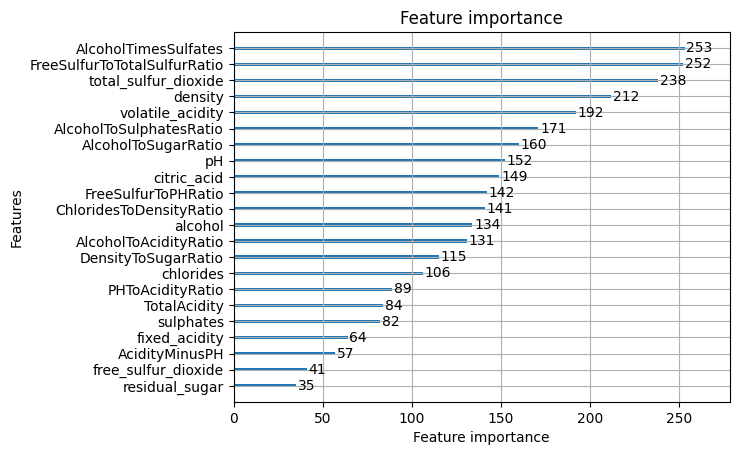

In [115]:
import lightgbm
lgb = lightgbm.LGBMRegressor(objective = 'mae')
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
median_absolute_error(y_test,lgb.predict(X_test))

0.4472818374633789

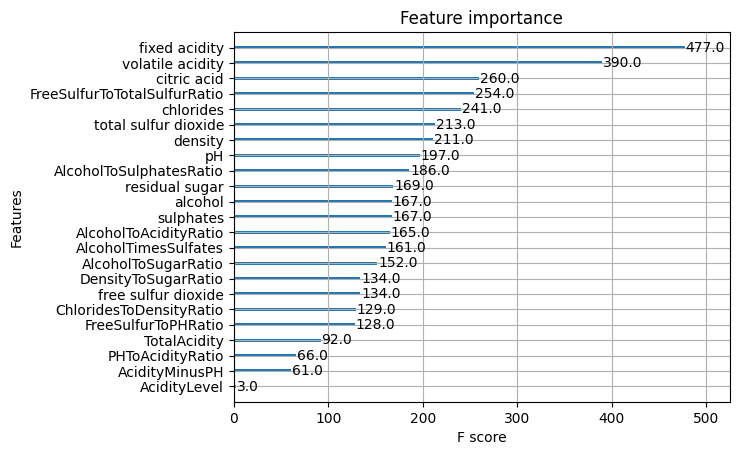

In [116]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
median_absolute_error(y_test,xgb.predict(X_test))

In [117]:
from lightgbm import LGBMRegressor
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['mae']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
    }


    model_lgb = LGBMRegressor(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [118]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [119]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'mae', 'max_depth': 1, 'min_child_samples': 9, 'learning_rate': 0.016079460110820225, 'n_estimators': 684, 'min_child_weight': 1, 'subsample': 0.8523663067424652, 'colsample_bytree': 0.996813467387874, 'reg_alpha': 0.26784540457367195, 'reg_lambda': 0.40988591984553147, 'seed': 42}


In [121]:
lgb = LGBMRegressor(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  0.031900371184184984


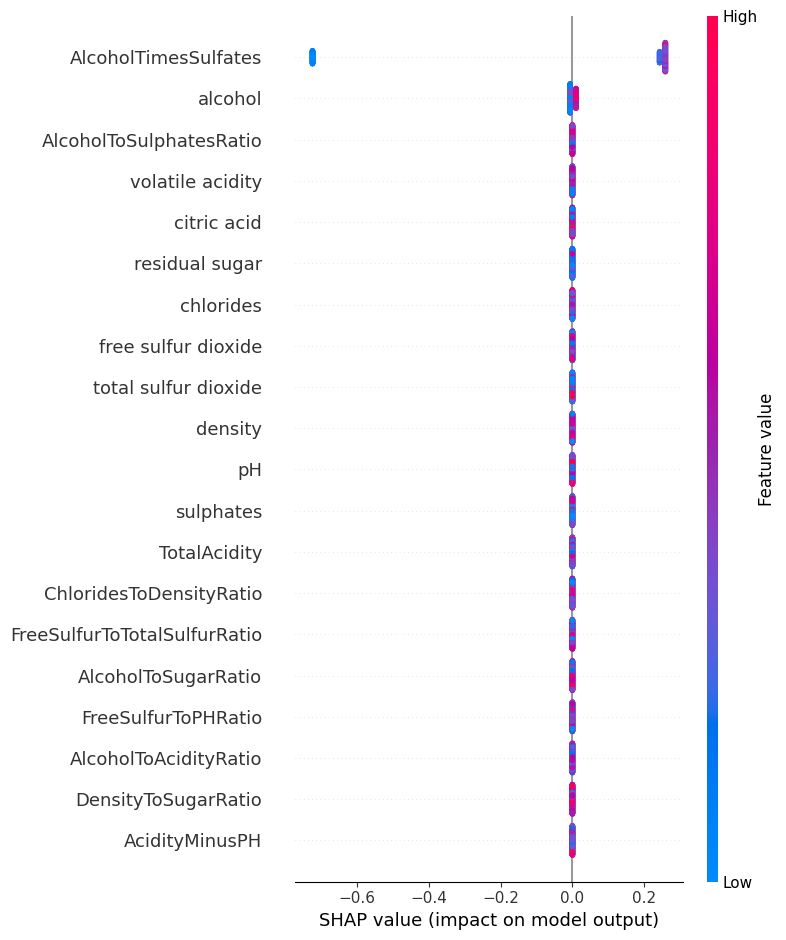

In [122]:
import shap 
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [123]:
from xgboost import XGBRegressor
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:absoluteerror']),
    }
    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [124]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [125]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 3, 'learning_rate': 0.014791528357668475, 'n_estimators': 779, 'min_child_weight': 8, 'gamma': 0.19691528157722027, 'subsample': 0.34397909516154057, 'reg_alpha': 0.9749331870958062, 'reg_lambda': 0.7550415953632336, 'seed': 42, 'objective': 'reg:absoluteerror'}


In [126]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  0.31534266471862793


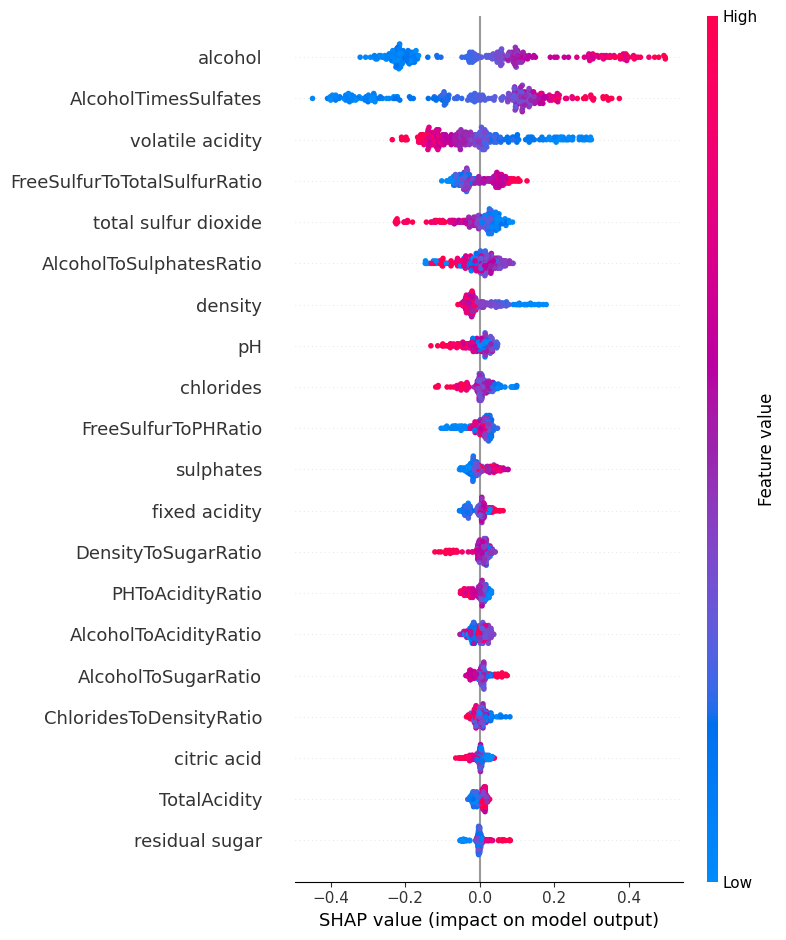

In [127]:
import shap 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)